In [1]:
#New file to vectorise the reviews to perform the data science on them

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words
from tqdm.notebook import tqdm

import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math


<b><h2>Handling of the review data and vectorising of the text

In [61]:
full_data = pd.read_csv("../data/review_dataset.csv")
full_data = pd.DataFrame(full_data)
full_data.dropna()
full_data = full_data.drop("Unnamed: 0", axis=1)

<h3><b>Sklearn.feature_extraction attempt to vectorise the data



In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pickle

In [67]:
vectoriser = TfidfVectorizer(ngram_range=(1,1))
tfidf_data = vectoriser.fit_transform(full_data["lemmatized review"])
features = vectoriser.get_feature_names_out()

In [106]:
svd = TruncatedSVD(n_components=8000)
svd.fit(tfidf_data)

TruncatedSVD(n_components=8000)

In [107]:
svdtfifdf_data = svd.transform(tfidf_data)


In [108]:
variance = svd.explained_variance_ratio_

(0.0, 8000.0)

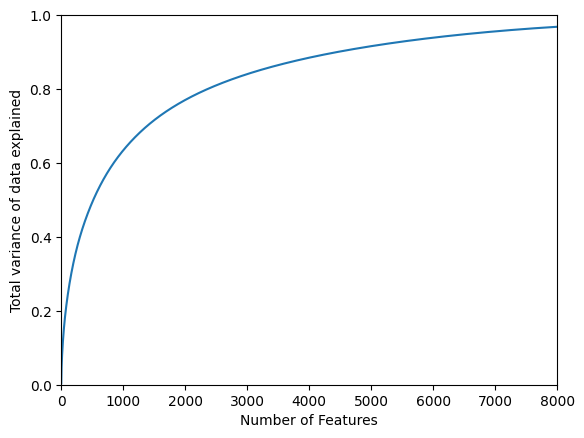

In [109]:
x = variance.cumsum()
plt.ylabel("Total variance of data explained")
plt.xlabel("Number of Features")
plt.plot(x)
plt.ylim(0,1)
plt.xlim(0,len(x))

In [110]:
labels = full_data["Keyword Contains"]
dfsvdtfidf = pd.DataFrame(svdtfifdf_data)

In [111]:
dfsvdtfidf["Labels"] = labels

In [112]:
data_with_labels = dfsvdtfidf.to_numpy()

In [113]:
count = 0 

for i in labels:
    if i == True:
        count +=1

In [114]:
np.save('svdtfidf',data_with_labels)

In [9]:
pickle.dump(svd,open("model.pkl",'wb'))